In [1]:
import datetime
from WindPy import *
w.start()
w.isconnected()

import pandas as pd

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


In [2]:
dates = ['{}-12-31'.format(i) for i in range(2001,2020)]

funds_dic = {'股票型基金':'1000031768000000', '混合型基金':'1000031769000000',
            '债券型基金':'1000031770000000', '货币型基金':'1000031771000000',
            'DQII型基金':'1000031772000000'}

In [3]:
l = []
for name,fund in funds_dic.items():
    scale_dic = dict()
    for date in dates:
        codes = w.wset("sectorconstituent","date=" + date + ";sectorid=" + fund +";field=wind_code")
        assert codes.ErrorCode == 0, '{} WSET 未成功提取基金明细数据，ErrorCode={}'.format(date, codes.ErrorCode. codes.Data)
        error,scale = w.wss(codes.Data[0], "prt_fundnetasset_total", "rptDate=" + date, usedf=True)
        assert error == 0, '{} WSS 未成功提取基金规模数据，ErrorCode={}'.format(date, error. scale.values)
        scale_dic[date] = scale.sum()[0]
    df = pd.DataFrame(data=scale_dic, index=[name])
    l.append(df)
data = pd.concat(l,axis=0).T

data=round(data/(10**9),2)

In [4]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white') # 设置主题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

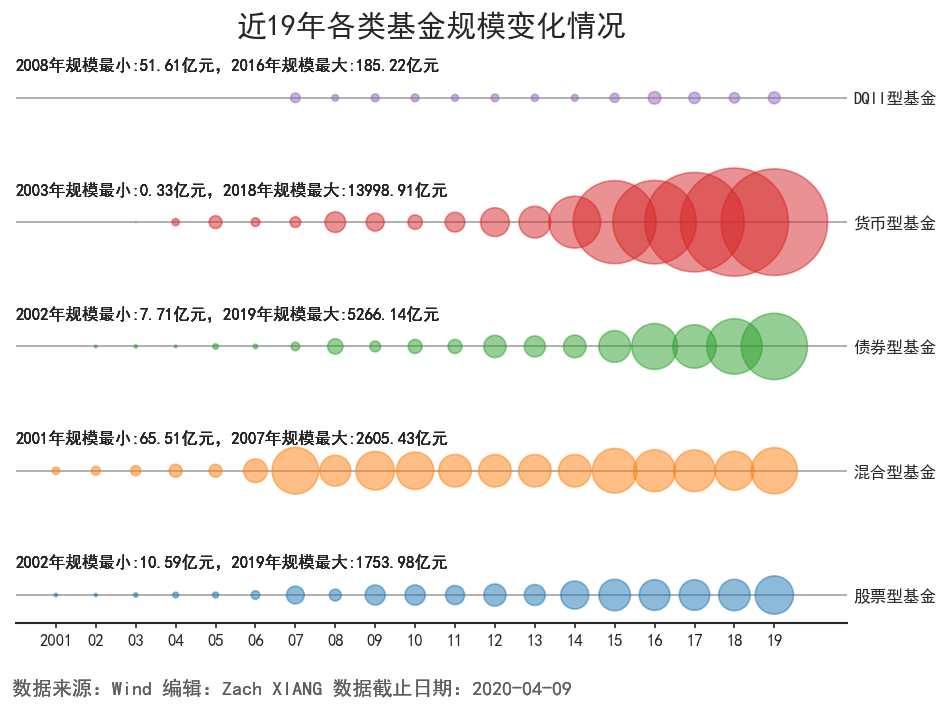

In [5]:
fig, ax = plt.subplots(figsize=(8,6),dpi=120)

dates = [str(i) for i in range(2001,2020)]
for col in data.columns:
    ax.scatter(x = dates, y = [col] * len(dates), s = 0.3 * data[col], alpha = 0.5, zorder = 100, marker = 'o')
    ax.axhline(y = col, color = '#8c8c8c', lw=1.0, zorder=1,alpha = 0.8)

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.tick_params(axis='x', which='major', width=1.00, length=3)
    ax.set_xticklabels(['2001'] + [date[-2:] for date in dates[1:]] )
    
    ax.yaxis.set_ticks_position('right')
    
    for i in range(0,len(data.columns)):
        col = data.columns[i]
        text = '{}年规模最小:{}亿元，{}年规模最大:{}亿元'.format(data[col][data[col]!=0].idxmin()[:4],data[col][data[col]!=0].min(),data[col][data[col]!=0].idxmax()[:4],data[col][data[col]!=0].max() )
        ax.text(x=-1, y=i+0.2, s=text, va='bottom')
    
    ax.set_title( '近19年各类基金规模变化情况', loc='center', pad=20, fontsize=18)
    ax.text(-1.1,-0.8,'数据来源：Wind 编辑：Zach XIANG 数据截止日期：2020-04-09', fontsize=12, alpha = 0.5, color='#5a5a5a')
plt.tight_layout()
plt.savefig('近19年各类基金规模变化情况.jpg')